# Predicting Diabetes Using The Female Pima Indians Dataset

## Sections

* The Pima Indians
* Machine Learning: A Classification Model
* Features
* Data
* Exploratory data analysis
* Fitting and Training the Model
    * Decision Tree Classifier
    * Random Forest Classifier
    * Logistic Regression Classifier
    * KNeighbors Classifier
* Finding the Best Hyperparameters
    * Grid Search
        * KNeighbors Classifier
        * Logistic Regression Classifier
    * Random Search
        * Random Forest Classifier
        * Logistic Regression Classifier
* Evaluating the Model
* Improvements
* Conclusion

## The Pima Indians

"The Pima (or Akimel O'odham, also spelt Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

## Machine Learning: A Classification Model

A *Classification* is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain.

In Machine learning there are 4 types of Classification tasks that a model can do:

* Binary Classification
* Multi-Class Classification
* Multi-Label Classification
* Imbalanced Classification

In this project, we will be making a **Binary Classification** model to predict whether someone has diabetes or not depending on several features that will be discussed next.

Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state (This is called **single-class classification** as apposed to **multi-class classification** which classifies multiple states). In this example, *diabetic* is the normal (1) or *'positive'* state and *non - diabetic* is the abnormal (0) or *'negative'* state.



## Features

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Blood Pressure: Diastolic blood pressure (mm Hg)
* Skin Thickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function that scores the likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## Data

> Original: [Early stage diabetes risk prediction dataset.](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.) Data Set - UCI Machine Learning Repository.
    
> Download: [Kaggle.](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Exploratory data analysis

In [1]:
# Exploratory data analysis (EDA) Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import tree
import graphviz

# Graphs for Jupyter Notebook Specifically
%matplotlib inline

# Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


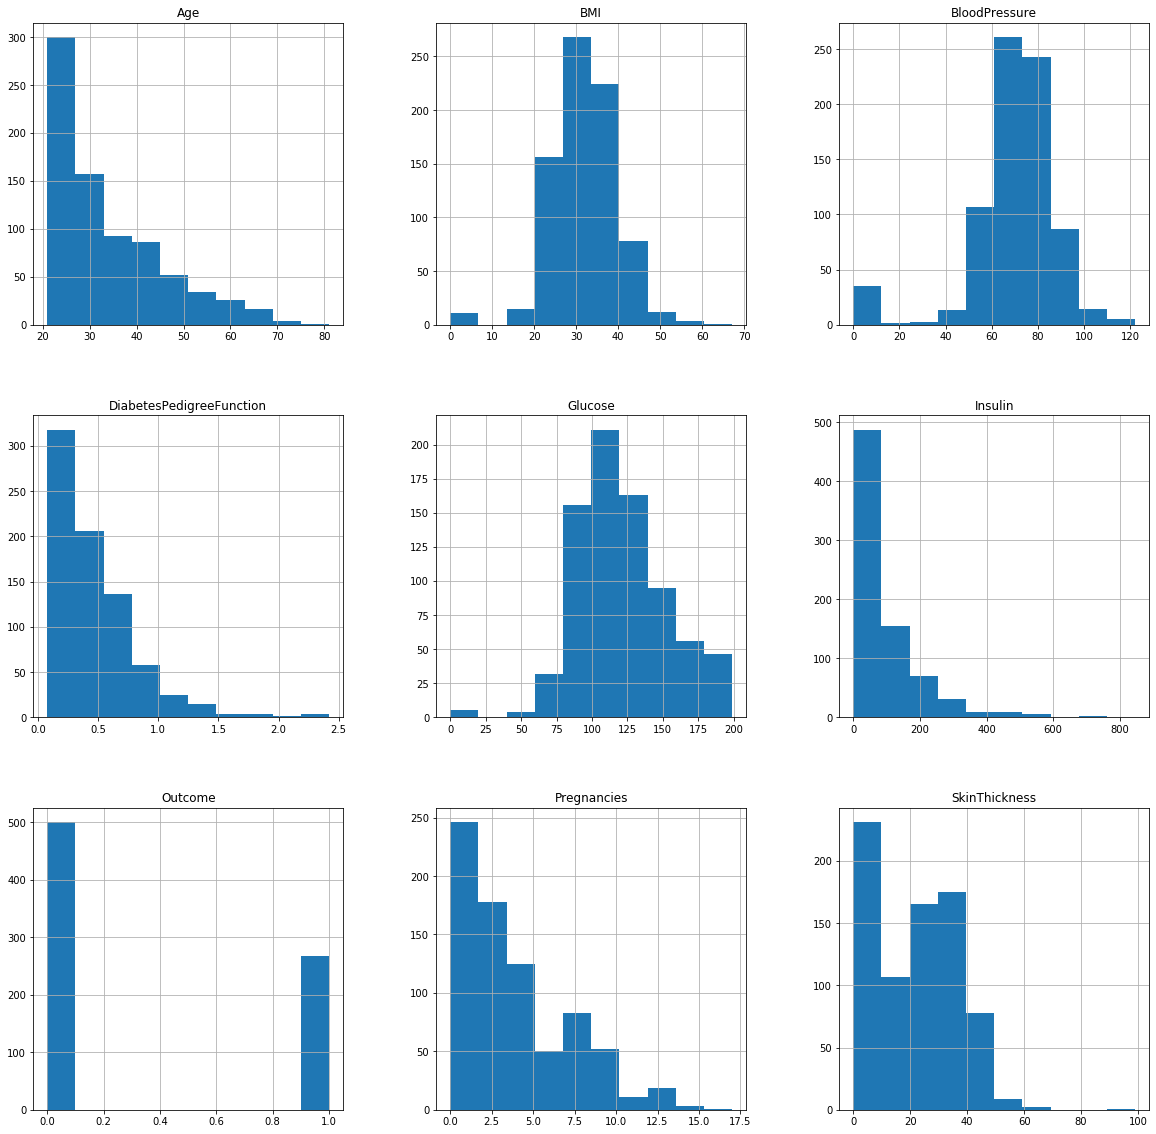

In [3]:
df.hist(figsize = (20,20));

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see here the sum of all the missing values in the database, and how their presence changes the distribution of the data below.

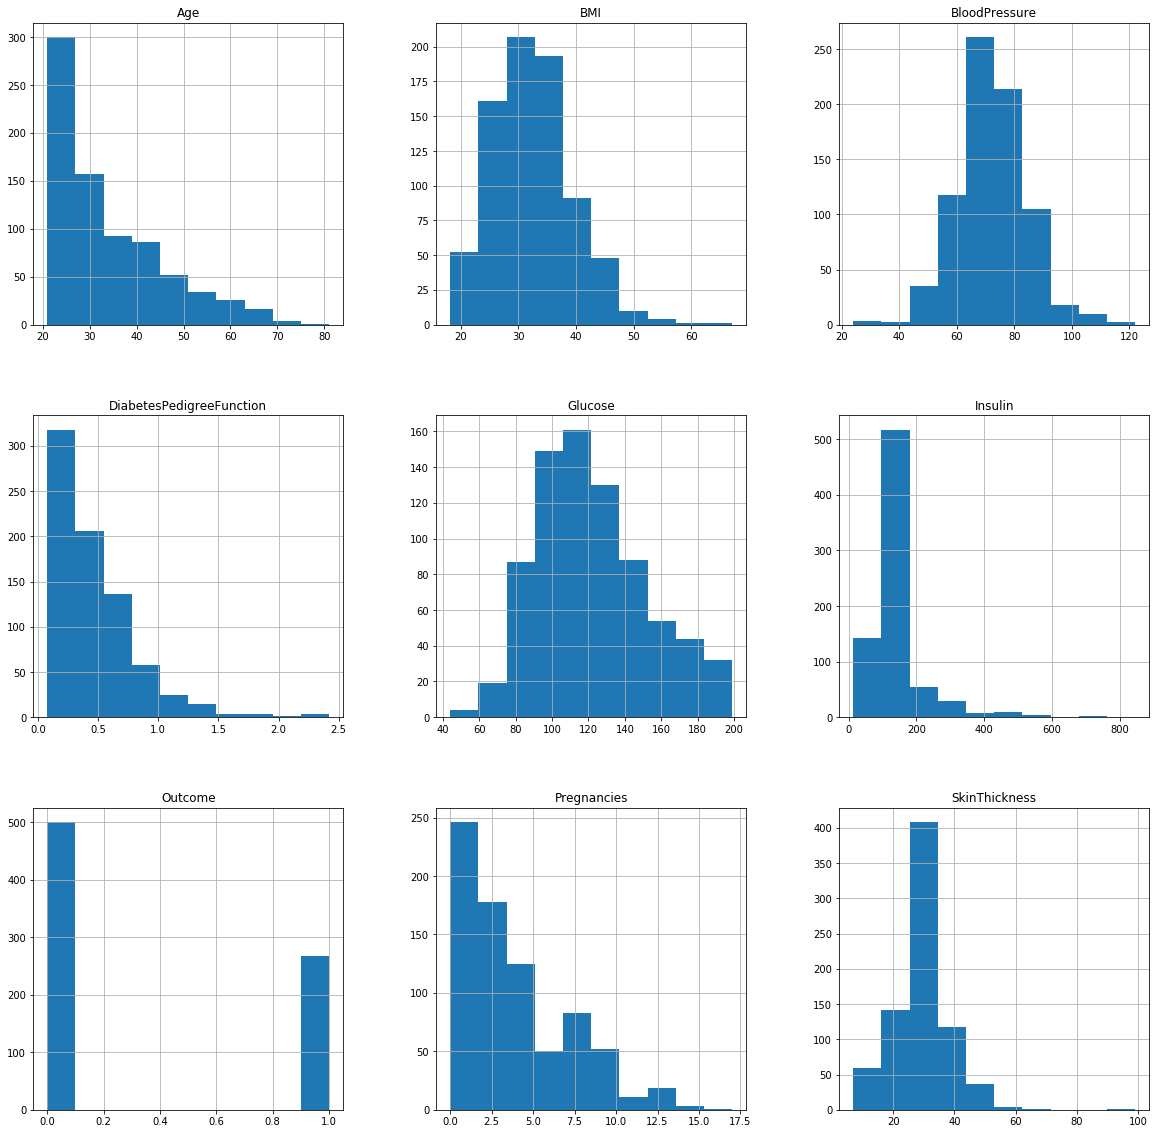

In [5]:
df["Glucose"] = df['Glucose'].fillna(df['Glucose'].mean())
df["BloodPressure"] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df["SkinThickness"] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df["Insulin"] = df['Insulin'].fillna(df['Insulin'].median())
df["BMI"] = df['BMI'].fillna(df['BMI'].median())
df.hist(figsize = (20,20));

In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


We have now fixed the data so that there are no 0 values where there shouldn't be.
E.g. You can't have a BMI value of 0

In [7]:
df.describe();

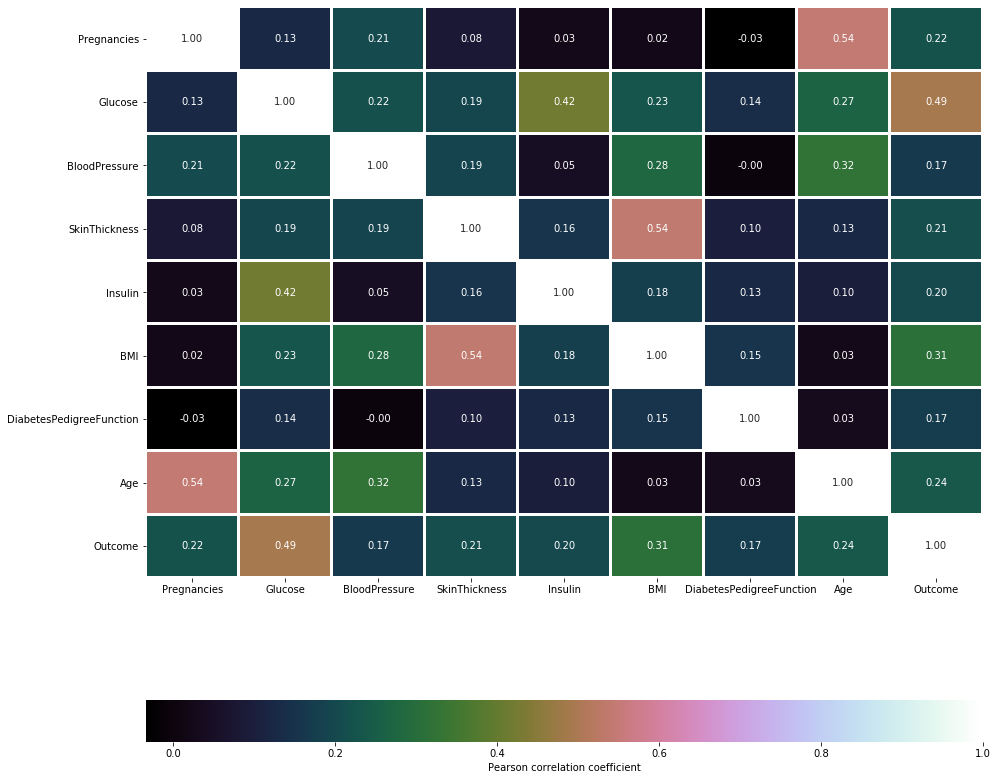

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=2, fmt= ".2f", cmap="cubehelix",annot=True, cbar_kws={'label': 'Pearson correlation coefficient', 'orientation': 'horizontal'});

Above is a heatmap showing, via the Pearson correlation coefficient, the correlation of the data in each plot in relation to each other. This is visualised easier below:

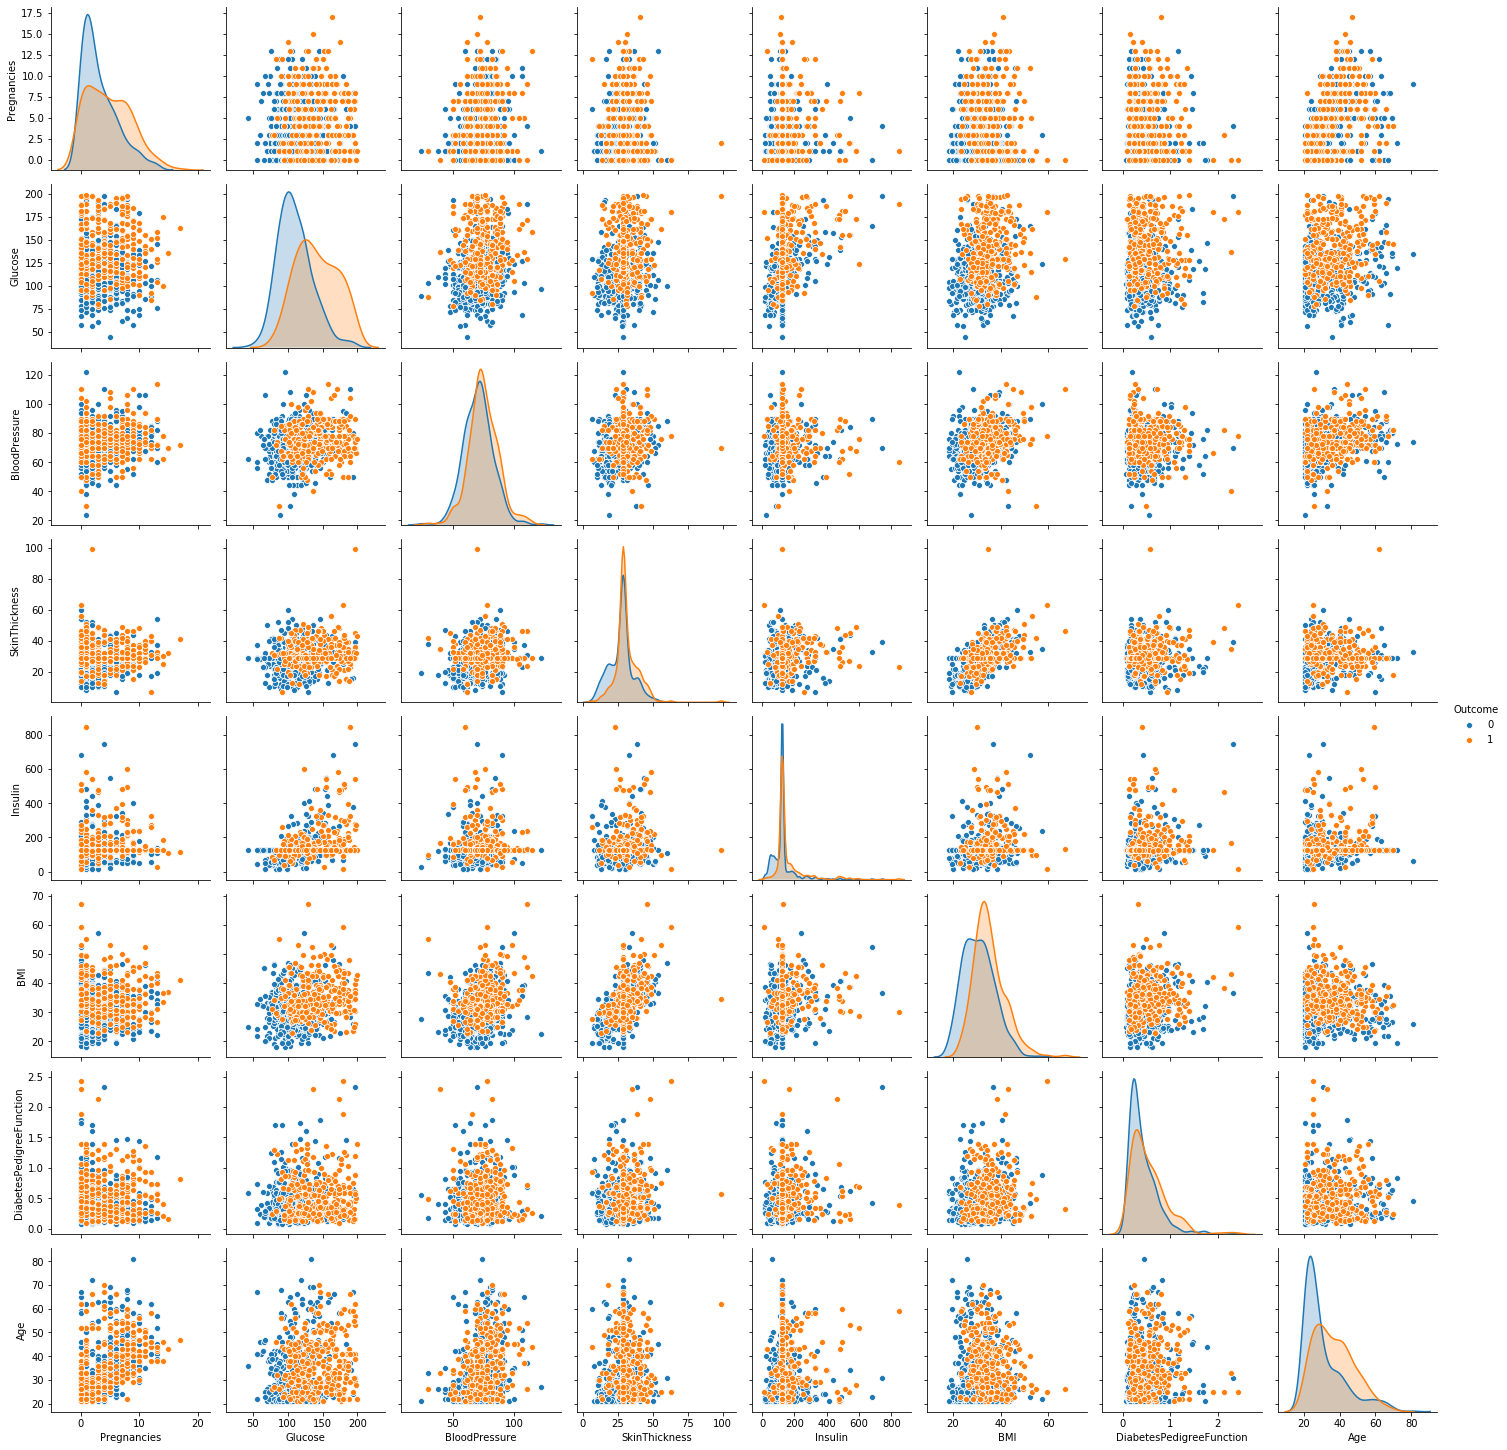

In [9]:
sns.pairplot(df, hue = 'Outcome');

In the pairplot above, we can see a multivariable distribution plot which shows the distribution of the data in each column, with the help of colour. It shows the colleration, or lack thereof, of all the features in relation to eachother.

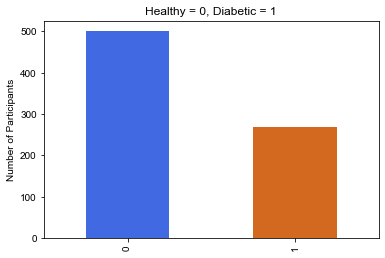

In [10]:
Outcomes = df.Outcome.value_counts()
Outcomes.plot(kind="bar", color = ["royalblue","chocolate"])
plt.ylabel("Number of Participants")
sns.set_style("dark")
plt.title("Healthy = 0, Diabetic = 1");

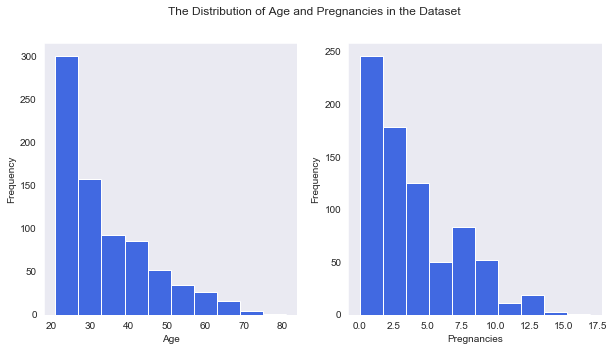

In [11]:
fig, axes = plt.subplots(ncols=2)
df.Age.plot.hist(color="royalblue", ax=axes[0], figsize = (10,5))
df.Pregnancies.plot.hist(color="royalblue", ax=axes[1])
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Pregnancies')
plt.suptitle("The Distribution of Age and Pregnancies in the Dataset");

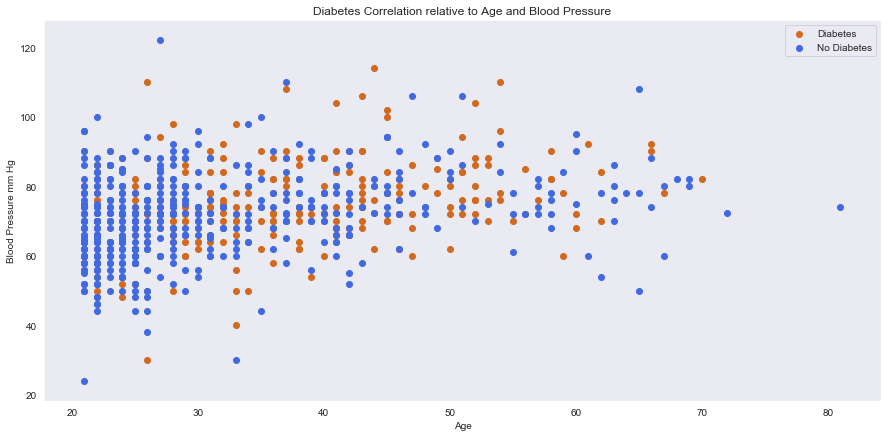

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(df.Age[df.Outcome==1], df.BloodPressure[df.Outcome==1], color="chocolate")
plt.scatter(df.Age[df.Outcome==0], df.BloodPressure[df.Outcome==0], color="royalblue")
plt.xlabel("Age")
plt.ylabel("Blood Pressure mm Hg");
plt.title("Diabetes Correlation relative to Age and Blood Pressure")
plt.legend(["Diabetes", "No Diabetes"]);

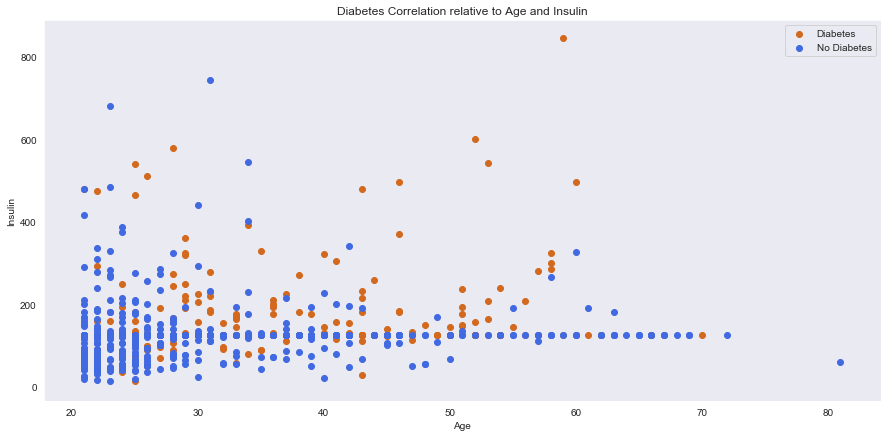

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(df.Age[df.Outcome==1], df.Insulin[df.Outcome==1], color="chocolate")
plt.scatter(df.Age[df.Outcome==0], df.Insulin[df.Outcome==0], color="royalblue")
plt.xlabel("Age")
plt.ylabel("Insulin");
plt.title("Diabetes Correlation relative to Age and Insulin")
plt.legend(["Diabetes", "No Diabetes"]);

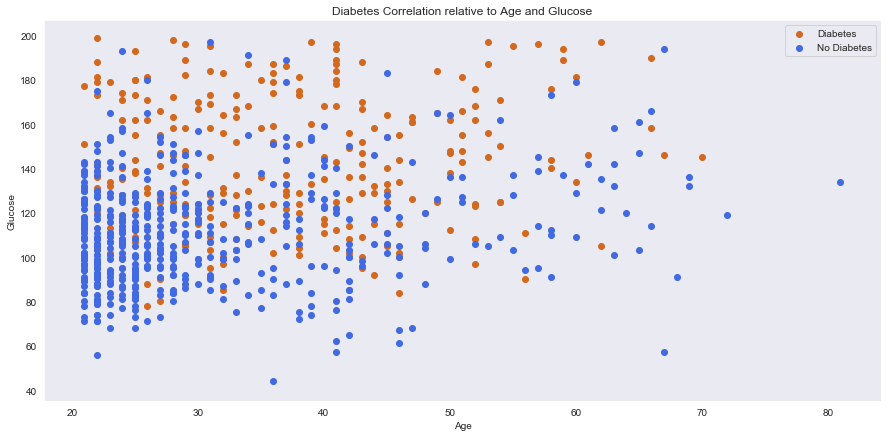

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(df.Age[df.Outcome==1], df.Glucose[df.Outcome==1], color="chocolate")
plt.scatter(df.Age[df.Outcome==0], df.Glucose[df.Outcome==0], color="royalblue")
plt.xlabel("Age")
plt.ylabel("Glucose");
plt.title("Diabetes Correlation relative to Age and Glucose")
plt.legend(["Diabetes", "No Diabetes"]);

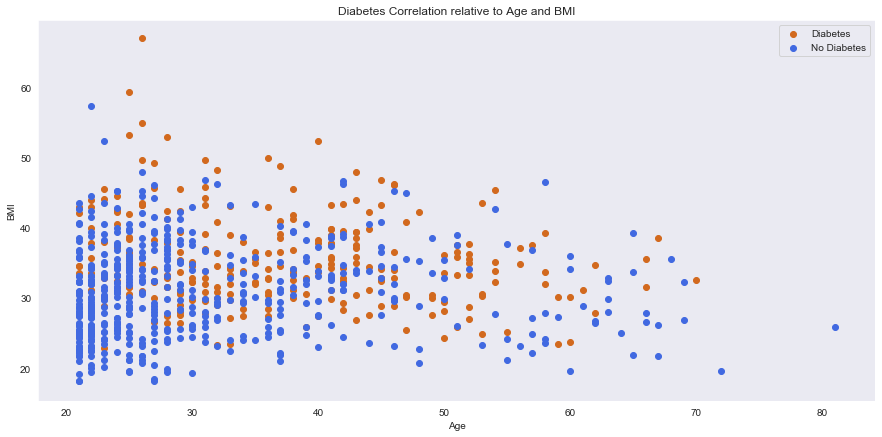

In [15]:
plt.figure(figsize=(15,7))
plt.scatter(df.Age[df.Outcome==1], df.BMI[df.Outcome==1], color="chocolate")
plt.scatter(df.Age[df.Outcome==0], df.BMI[df.Outcome==0], color="royalblue")
plt.xlabel("Age")
plt.ylabel("BMI");
plt.title("Diabetes Correlation relative to Age and BMI")
plt.legend(["Diabetes", "No Diabetes"]);

These graphs above are just a few of the correlations in the dataset, showing a lack of correlations between features

## Fitting and Training the Model

In [16]:
# Splitting the data to Test and Train dataframes (df)
X = df.drop(columns = ["Outcome"])
Y = df["Outcome"]

In [17]:
# Scale the data.
# If not done, then the machine learning algorithm will tend to weigh greater values higher and consider smaller values as the lower values, regardless of the unit of the values
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),columns=['Pregnancies',
                                                                             'Glucose',
                                                                             'BloodPressure',
                                                                             'SkinThickness',
                                                                             'Insulin','BMI',
                                                                             'DiabetesPedigreeFunction',
                                                                             'Age'])

In [18]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [19]:
# Load the different algorithms from Scikit-Learn into a dictionary
model_type = {"Decision Tree Classifier": DecisionTreeClassifier(),
              "Random Forest Classifier": RandomForestClassifier(),
              "Logistic Regression Model": LogisticRegression(),
              "K Neighbors Classifier": KNeighborsClassifier()}

# Run through the model dictionary to be fitted and evaluated based on accuracy
# Differentiate between the test and train data
# Store the model accuracy score to be displayed later
def ML_Prediction(model_type, X_tr, X_te, Y_tr, Y_te):
    np.random.seed(42)
    # Make a an empty list to keep model scores
    model_prediction = {}
    # Loop through the algorithm's names and type
    for name, model in model_type.items():
        # Fit the model to the data
        model.fit(X_tr, Y_tr)
        # Evaluate the model and append it to the model_prediction list
        model_prediction[name] = model.score(X_te, Y_te)
    return model_prediction

In [20]:
# Runs through the function
model_prediction = ML_Prediction(model_type,X_train,X_test,Y_train,Y_test)

In [21]:
# Stores the evaluated algorithms in a dataframe to be visualised
model_predictions = pd.DataFrame(model_prediction, index=["Model Accuracy"])
model_predictions

,Decision Tree Classifier,Random Forest Classifier,Logistic Regression Model,K Neighbors Classifier
Model Accuracy,0.714286,0.798701,0.811688,0.75974


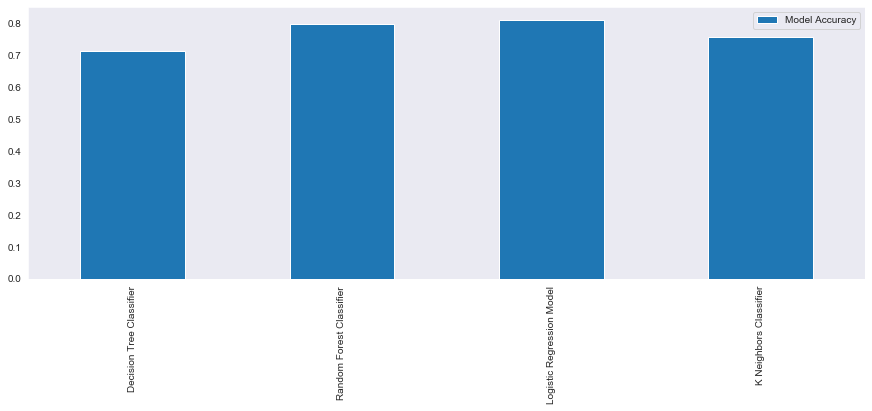

In [22]:
model_predictions.T.plot.bar(figsize=(15,5));

In [23]:
# This is to show how the algorithm works and the processes it goes through.
# You can find the image in my Github as Diabetes_DC.png
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
model.predict(X_test)
fn=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
tree.export_graphviz(model,
                     out_file = "Diabetes_DC.dot",
                     feature_names = fn,
                     class_names=True,
                     label="all",
                     rounded = True,
                     filled = True)

The max test score for the Neighbors Algorithm was  83.8 %
The max train score for the Neighbors Algorithm was  100.0 %


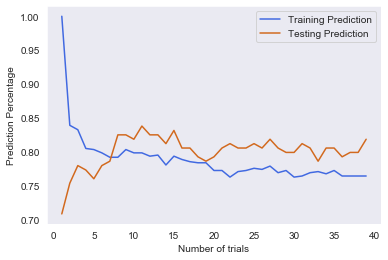

In [24]:
# This also shows how the Neighbors Classifier works
model_KNC = KNeighborsClassifier()
train = [] # Make a train list
test = [] # Make a test list
# Set a range of values for the n_neighbors to run through
for x in range(1,40):
    model_KNC.set_params(n_neighbors = x) # set neighbors value
    model_KNC.fit(X_train, Y_train)# Fit the model with the test and train data
    test.append(model_KNC.score(X_test, Y_test)) # Add it to the test list
    train.append(model_KNC.score(X_train, Y_train)) # Add it to the train list

# Plot for better visualisation
plt.plot(range(1,40), train, label = "Training Prediction", color = "royalblue")
plt.plot(range(1,40), test, label = "Testing Prediction", color = "chocolate")
plt.legend()
plt.xlabel("Number of trials")
plt.ylabel("Prediction Percentage")
print("The max test score for the Neighbors Algorithm was ", round(max(test),3)*100,"%")
print("The max train score for the Neighbors Algorithm was ", max(train)*100,"%")

## Finding the Best Hyperparameters

### Grid Search
#### KNeighbors Classifier

In [25]:
# Grid Search passes all combinations of hyperparameters one by one into the model and check the result.
# It then gives us the set of hyperparemeters which gives the best result after passing in the model.

# Setup grid hyperparameter search for Neighbors Classifier
param_grid_knc = {'n_neighbors':np.arange(1,50)}
knc_cv= GridSearchCV(KNeighborsClassifier(),param_grid_knc,cv=5)
knc_cv.fit(X_train,Y_train)

# Find and evaluate the best hyperparameter for this model
print(f"Best Score: {knc_cv.best_score_*100:.2f}%")
print("Best Parameters: " + str(knc_cv.best_params_))

Best Score: 75.25%
Best Parameters: {'n_neighbors': 9}


#### Logistic Regression Classifier

In [26]:
# Setup grid hyperparameter search for LogisticRegression
param_grid_log = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
log_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_log, cv=5, verbose=True)
log_cv.fit(X_train, Y_train);

# Find and evaluate the best hyperparameter for this model
print(f"Best Score: {log_cv.best_score_*100:.2f}%")
print("Best Parameters: " + str(log_cv.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best Score: 76.55%
Best Parameters: {'C': 0.615848211066026, 'solver': 'liblinear'}


### Random Search

#### Random Forest Classifier

In [27]:
# Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model
# Setup hyperparameter for Random Forest
param_rs_randf = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random search for RandomForestClassifier
randf_cv = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=param_rs_randf,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
randf_cv.fit(X_train, Y_train);

# Find and evaluate the best parameters for this model
print(f"Best Score: {randf_cv.best_score_*100:.2f}%")
print("Best Parameters: " + str(randf_cv.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.4s finished


Best Score: 75.90%
Best Parameters: {'n_estimators': 310, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_depth': 5}


#### Logistic Regression Classifier

In [28]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rand_log_cv = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=param_grid_log,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rand_log_cv.fit(X_train, Y_train);

# Find and evaluate the best hyperparameter for this model
print(f"Best Score: {rand_log_cv.best_score_*100:.2f}%")
print("Best Parameters: " + str(rand_log_cv.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best Score: 76.55%
Best Parameters: {'solver': 'liblinear', 'C': 0.615848211066026}


As you can see, the **Logistic Regression Algorithm** gave us the best accuracy and therefore we will be using it from now on. With:

*Best Parameters: {'solver': 'liblinear', 'C': 0.615848211066026}*

## Evaluating the Model

To evaluate the model, we will use the following elements:
    
* Confusion matrix : also known as the error matrix, allows visualization of the performance of an algorithm :

    * true positive (TP) : Diabetic correctly identified as diabetic
    * true negative (TN) : Healthy correctly identified as healthy
    * false positive (FP) : Healthy incorrectly identified as diabetic
    * false negative (FN) : Diabetic incorrectly identified as healthy


* Metrics :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
        * Accuracy of the model
    * Precision : TP / (TP + FP)
        * Uses the proportion of positive (1) values which were correctly classified to evaluate. A perfect model would have a score of 1.0
    * Recall : TP / (TP + FN)
        * Uses the proportion of actual positives (1) which were correctly classified.
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall))
        * Combines Recall and Precision
   
   
* Roc Curve : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

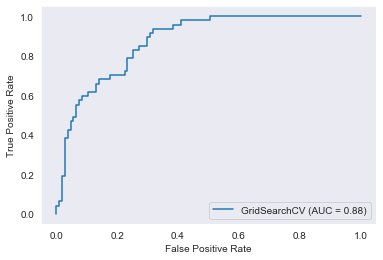

In [29]:
plot_roc_curve(log_cv, X_test, Y_test);

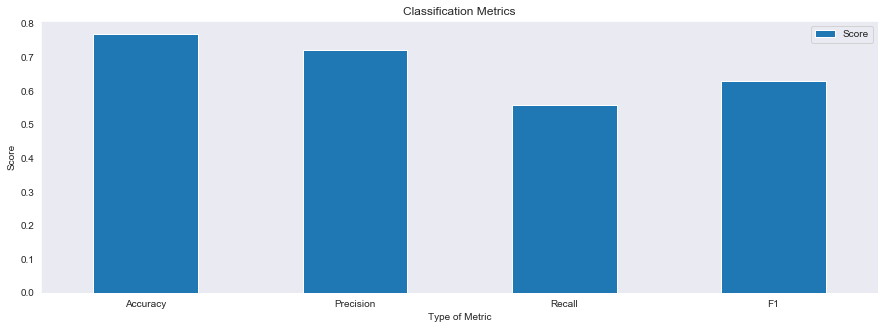

In [30]:
# Now we make a new model with the optimised hyperparameters we got from the GridSearchCV and RandomSearchCV
op_log = LogisticRegression(C=0.615848211066026,
                         solver="liblinear")

# Then we cross validate the new model, checking its Accuracy, Precision, Recall and F1
Accuracy = np.mean(cross_val_score(op_log,X,Y,cv=5,scoring="accuracy"))
Precision = np.mean(cross_val_score(op_log,X,Y,cv=5,scoring="precision"))
Recall = np.mean(cross_val_score(op_log,X,Y,cv=5,scoring="recall"))
F1 = np.mean(cross_val_score(op_log,X,Y,cv=5,scoring="f1"))

model_type = {"Accuracy": Accuracy,
              "Precision": Precision,
              "Recall": Recall,
              "F1": F1}

# Display the results for better visualisation
model_eval = pd.DataFrame(model_type, index = ["Score"])
model_eval.T.plot.bar(legend=False, title="Classification Metrics", figsize=(15,5));
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Type of Metric")
plt.ylabel("Score")
plt.legend();

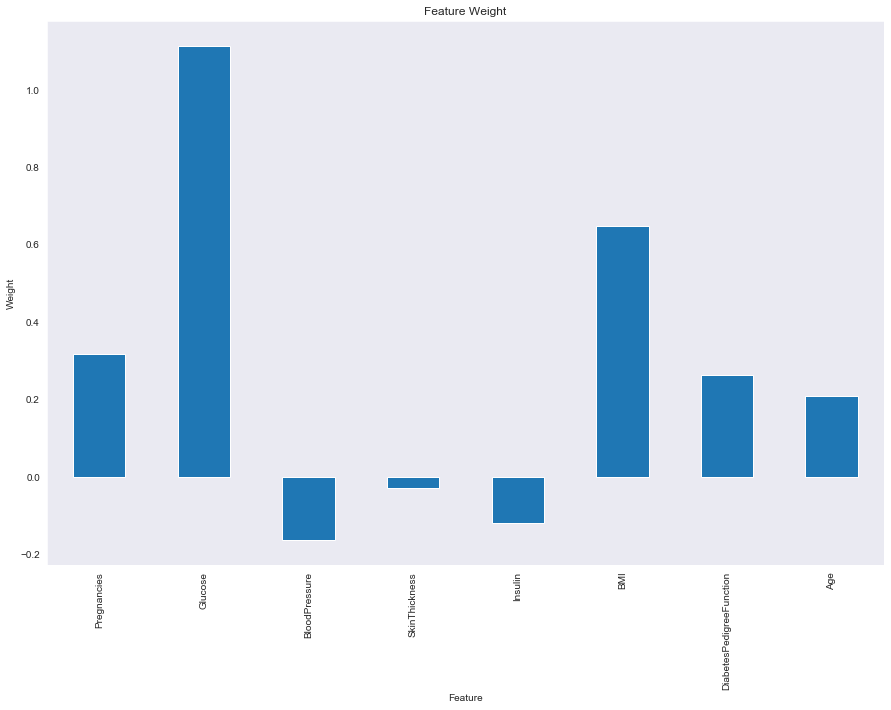

In [31]:
op_log.fit(X_train,Y_train)
coeff = op_log.coef_
features = dict(zip(X.columns, list(coeff[0])))
Imp_Features = pd.DataFrame(features, index=[0])
Imp_Features.T.plot.bar(legend = False, figsize = (15,10))
plt.xticks(horizontalalignment="center")
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.title("Feature Weight");

Above is the calculated **feature weight**, which shows the importance of each feature and how it's taken into consideration

In [32]:
# Here we make predictions on test data
Y_pred = op_log.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [33]:
# Compare the predicted values to the actual ones
conf_matrix = confusion_matrix(Y_test, Y_pred)

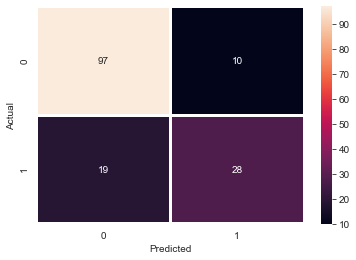

In [34]:
conf_matrix = pd.crosstab(Y_test, Y_pred,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, linewidths=2,annot=True);

The Diagonal values of the heatmap above represent accurate predictions, while the non-diagonal predictions are not accurate and shouldn't be treated as so. Regarding the output, 97 and 28 are actual predictions and 10 and 19 are innacurate predictions.

* TP = True Positives = 97
* TN = True Negatives = 28
* FP = False positives = 19
* FN = False negatives = 10

In [35]:
Accuracy = accuracy_score(Y_test,Y_pred)
Precision = precision_score(Y_test,Y_pred)
Recall = recall_score(Y_test,Y_pred)
F1 = f1_score(Y_test,Y_pred)
print(f"Accuracy in Percentage: {Accuracy*100:.2f}%")
print(f"Precision in Percentage: {Precision*100:.2f}%")
print(f"Recall in Percentage: {Recall*100:.2f}%")
print(f"F1 in Percentage: {F1*100:.2f}%")

Accuracy in Percentage: 81.17%
Precision in Percentage: 73.68%
Recall in Percentage: 59.57%
F1 in Percentage: 65.88%


## Improvements

* To make this a more accurate model, more features would be required, as in this model especially, features such as Sex would greatly change the validity of this model and provide a more well rounded prediction. On the other hand, too many features can negatively affect a model as it can lead to *overfitting*, where the model is fit specifically for a certain dataset and may perform worse with another dataset.


* As seen previously, this dataset is bias towards women and skewed towards young women, thus not giving an accurate and realistic sample of a population. Sex is not taken into account in the features when training this model and that's a problem as your sex is a fundamental biological factor and can alter your risk of developing diabetes (Kautzky-Willer, Harreiter and Pacini, 2016).


Kautzky-Willer, A., Harreiter, J. and Pacini, G. (2016). Sex and Gender Differences in Risk, Pathophysiology and Complications of Type 2 Diabetes Mellitus. Endocrine Reviews, [online] 37(3), pp.278–316. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4890267/ [Accessed 17 Feb. 2021].

## Conclusion

This model has an accuracy of 81%, which is less than the 95% standard and would therefore not be used clinically in diagnosing patients.

Another reason, is that while 81% may still seem OK, the precision and recall scores are not, at a 73% and 59% respectively.

In this context, Precision measures the percentage of positive diabetics that were correctly classified while recall measures the percentage of actual diabetic that were correctly classified.

If a patient is falsly diagnosed with diabetes and provided medication that would increase insulin levels, this would be very dangerous, as while the standard Metformin would not harm someone to a life - threatening extent, other medication may have irreversable effects.

The F1 score. This score is the harmonic mean of the precision and recall. With a 100% being a perfect precision and recall. However, depending on the dataset, this F1 score doesn't work well to give a good evaluation as it gives equal weight of both Precision and Recall. Depending on what is required from the model, precision and recall may not have equal weighing when evaluating it.

Finally, we have our ROC graph.

> AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

This models AUC value was 0.88. The AUC is a normally desirable metric as it:
1. Measures the ranking of the predictions
2. Measures the quality of these prediction, regardless of what classification threshold

However, this is not always a good thing as there may be a greater cost in wrongly predicting one part than the other.
In a clinical example, with pregnancies, you would likely want to minimise false negatives than false positives as a false negative can have worse effects on a unborn baby depending on the mother's lifestyle habits.

The AUC metric would not be particularly useful in this situation.

In conclusion, the model has an accuracy of 81%, a F1 score of 65% and a AUC value of 0.88. With this information, this model would not be used in a clinical environment as these scores are too low and the data is biased. It would put too many peoples lives at risk and thus be more harm than good.

A better alternative, would be a model trained with a non-skewed dataset filled with both sexes and can suitable represent the demographic it is aimed towards. With a larger dataset and number of features, this model could predict, to a greater percentage accuracy, whether a person is diabetic or not.